## The PNG brain images used in this notebook are acquired using Niffler's PNG extraction module where it was applied on DICOM images downloaded from TCIA

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Exploring on a test sample

In [2]:
img = cv2.imread('png_brain_mri/0ab0775d5626fcb695eea833a25ec99a8f64b80a54cca89654919071.png',0)
img.shape

(192, 192)

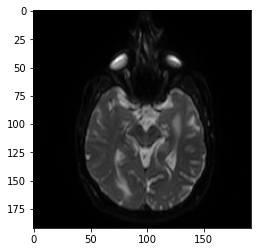

In [3]:
plt.imshow(img, cmap='gray')

In [4]:
np.max(img), np.min(img)

(255, 0)

### After experimenting with some threshold values

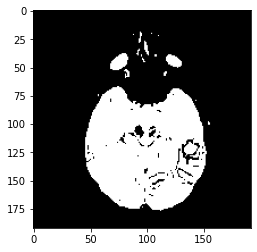

In [5]:
orig_img_copy = img.copy()
thresh_image = cv2.threshold(orig_img_copy, 45, 255, cv2.THRESH_BINARY)[1] 
plt.imshow(thresh_image, cmap='gray')

18


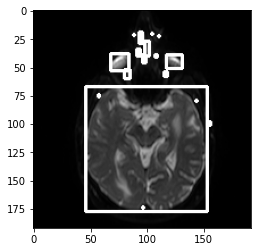

In [6]:
contours,h = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

for i in contours:
    x,y,w,h = cv2.boundingRect(i)
    cv2.rectangle(orig_img_copy, (x, y), (x + w, y + h), (255,0,0), 2)
    
plt.imshow(orig_img_copy, cmap='gray')

## The images need some preprocessing and filtering to produce more accurate bounding boxes

## I will use histogram equalization, gaussian filter and median filter separately and also drops bounding boxes of area less than a stated threshold to ignore small artifacts in binarized image

In [7]:
def draw_bounding_box(thresh_image, orig_img, area_thresh):
    '''
    Use the binarized image to find contours in image and draw bounding boxes around them.
    Note:  the function ignores the bounding boxes of area less than threshold
    
    Parameters:
    thresh_image: binary image
    orig_img: original image to draw bounding boxes on it
    area_thresh: minimum area for bounding box to be accepted and drawn
    
    return: None
    '''
    
    thresh_im = thresh_image.copy()
    contours,h = cv2.findContours(thresh_im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for i in contours:
        x,y,w,h = cv2.boundingRect(i)
        if get_box_area(w,h) < area_thresh:
            continue
        cv2.rectangle(orig_img, (x, y), (x + w, y + h), (255,0,0), 2)

In [8]:
def get_box_area(width, height):
    '''
    get area of a box
    
    Parameters: width and height of box
    return: area
    '''
    return width*height

Text(0.5, 1.0, 'Median Filter')

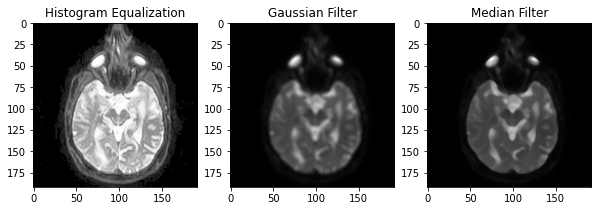

In [9]:
plt.rcParams['figure.figsize'] = (10,10)

img_copy = img.copy()

equ_img = cv2.equalizeHist(img_copy)                              # Histogram Equalization
gauss_img = cv2.GaussianBlur(img_copy,(5,5),cv2.BORDER_DEFAULT)   # Gaussian filter
median_img = cv2.medianBlur(img_copy, 5)                          # Median filter

plt.subplot(1,3,1)
plt.imshow(equ_img, cmap='gray')
plt.title('Histogram Equalization')
plt.subplot(1,3,2)
plt.imshow(gauss_img, cmap='gray')
plt.title('Gaussian Filter')
plt.subplot(1,3,3)
plt.imshow(median_img, cmap='gray')
plt.title('Median Filter')

Text(0.5, 1.0, 'Median Filter')

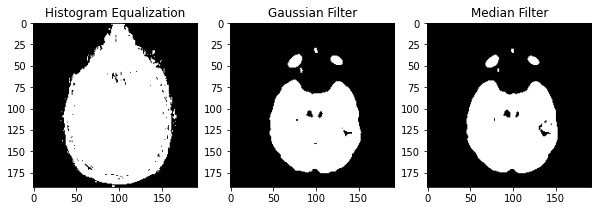

In [10]:
thresh_equ = cv2.threshold(equ_img, 45, 255, cv2.THRESH_BINARY)[1]
thresh_gauss = cv2.threshold(gauss_img, 45, 255, cv2.THRESH_BINARY)[1]
thresh_median = cv2.threshold(median_img, 45, 255, cv2.THRESH_BINARY)[1]

plt.subplot(1,3,1)
plt.imshow(thresh_equ, cmap='gray')
plt.title('Histogram Equalization')
plt.subplot(1,3,2)
plt.imshow(thresh_gauss, cmap='gray')
plt.title('Gaussian Filter')
plt.subplot(1,3,3)
plt.imshow(thresh_median, cmap='gray')
plt.title('Median Filter')

Text(0.5, 1.0, 'Median Filter')

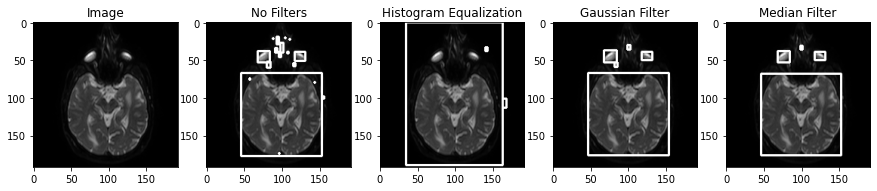

In [13]:
plt.rcParams['figure.figsize'] = (15,15)
img_copy_equ = img.copy()
img_copy_gauss = img.copy()
img_copy_median = img.copy()

area_thresh = 10
draw_bounding_box(thresh_equ, img_copy_equ, area_thresh)
draw_bounding_box(thresh_gauss, img_copy_gauss, area_thresh)
draw_bounding_box(thresh_median, img_copy_median, area_thresh)

plt.subplot(1,5,1)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.subplot(1,5,2)
plt.imshow(orig_img_copy, cmap='gray')
plt.title('No Filters')
plt.subplot(1,5,3)
plt.imshow(img_copy_equ, cmap='gray')
plt.title('Histogram Equalization')
plt.subplot(1,5,4)
plt.imshow(img_copy_gauss, cmap='gray')
plt.title('Gaussian Filter')
plt.subplot(1,5,5)
plt.imshow(img_copy_median, cmap='gray')
plt.title('Median Filter')

# Try Median filter with another image

Text(0.5, 1.0, 'Image with bounding boxes')

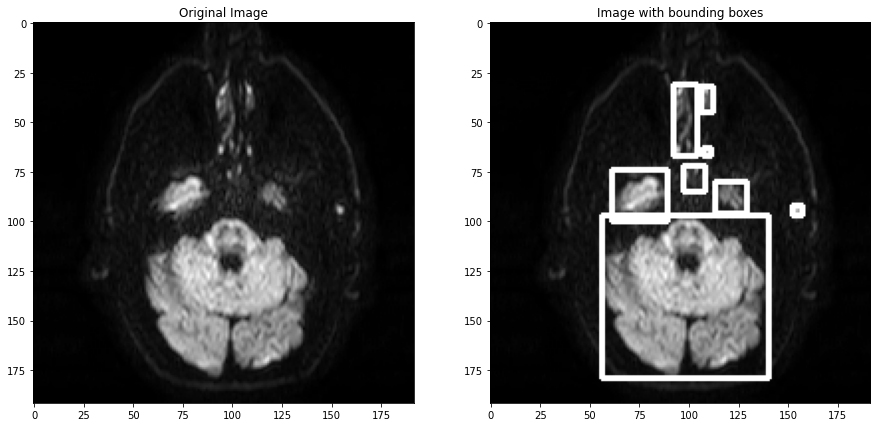

In [14]:
image = cv2.imread('png_brain_mri/54a4c466542ada7fb1799c6beaaee1c7aeafbd3fa47b1e7fcbeb2221.png',0)
image_copy = image.copy()
median_image = cv2.medianBlur(image_copy, 5) 
thresh_image = cv2.threshold(median_image, 45, 255, cv2.THRESH_BINARY)[1] 
draw_bounding_box(thresh_image, image_copy, area_thresh)

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(image_copy, cmap='gray')
plt.title('Image with bounding boxes')

# of course to differentiate between detected regions, other features could be used like moments to get regions's area and centroid